In [5]:
### Data Collection
import pandas_datareader as pdr
key="aef0b18bffd4d6a5805d0f5088326a32ba0af038"

In [6]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [7]:
df.to_csv('AAPL.csv')

In [8]:
import pandas as pd

In [9]:
df=pd.read_csv('AAPL.csv')

In [10]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-10-21 00:00:00+00:00,116.60,116.91,116.28,116.81,23192665,27.333113,27.405783,27.258100,27.382341,92770660,0.0,1.0
1,AAPL,2016-10-24 00:00:00+00:00,117.65,117.74,117.00,117.10,23538673,27.579252,27.600350,27.426880,27.450322,94154692,0.0,1.0
2,AAPL,2016-10-25 00:00:00+00:00,118.25,118.36,117.31,117.95,48128970,27.719903,27.745689,27.499550,27.649577,192515880,0.0,1.0
3,AAPL,2016-10-26 00:00:00+00:00,115.59,115.70,113.31,114.31,66134219,27.096351,27.122137,26.561879,26.796297,264536876,0.0,1.0
4,AAPL,2016-10-27 00:00:00+00:00,114.48,115.86,114.10,115.39,34562045,26.836148,27.159644,26.747069,27.049468,138248180,0.0,1.0


In [11]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2021-10-13 00:00:00+00:00,140.91,141.400,139.20,141.235,78762721,140.91,141.400,139.20,141.235,78762721,0.0,1.0
1253,AAPL,2021-10-14 00:00:00+00:00,143.76,143.880,141.51,142.110,69907100,143.76,143.880,141.51,142.110,69907100,0.0,1.0
1254,AAPL,2021-10-15 00:00:00+00:00,144.84,144.895,143.51,143.770,67940334,144.84,144.895,143.51,143.770,67940334,0.0,1.0
1255,AAPL,2021-10-18 00:00:00+00:00,146.55,146.840,143.16,143.445,85589175,146.55,146.840,143.16,143.445,85589175,0.0,1.0
1256,AAPL,2021-10-19 00:00:00+00:00,148.76,149.170,146.55,147.010,76378894,148.76,149.170,146.55,147.010,76378894,0.0,1.0


In [12]:
df1=df.reset_index()['close']

In [13]:
df1

0       116.60
1       117.65
2       118.25
3       115.59
4       114.48
         ...  
1252    140.91
1253    143.76
1254    144.84
1255    146.55
1256    148.76
Name: close, Length: 1257, dtype: float64

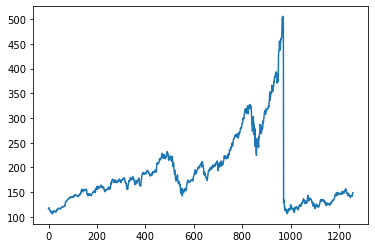

In [14]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [291]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [15]:
import numpy as np

In [16]:
df1

0       116.60
1       117.65
2       118.25
3       115.59
4       114.48
         ...  
1252    140.91
1253    143.76
1254    144.84
1255    146.55
1256    148.76
Name: close, Length: 1257, dtype: float64

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [18]:
print(df1)

[[0.02719916]
 [0.02982167]
 [0.03132025]
 ...
 [0.09773215]
 [0.1020031 ]
 [0.10752285]]


In [19]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [21]:
training_size,test_size

(817, 440)

In [22]:
train_data

array([[0.02719916],
       [0.02982167],
       [0.03132025],
       [0.02467656],
       [0.02190419],
       [0.02000599],
       [0.01955642],
       [0.01443629],
       [0.01468605],
       [0.01029022],
       [0.00781757],
       [0.01173885],
       [0.01336231],
       [0.01291273],
       [0.00519506],
       [0.00679355],
       [0.        ],
       [0.00349668],
       [0.01068984],
       [0.01058994],
       [0.01086468],
       [0.01503572],
       [0.01521055],
       [0.0137869 ],
       [0.01518557],
       [0.0146361 ],
       [0.01436136],
       [0.01201359],
       [0.00944103],
       [0.01046506],
       [0.00849193],
       [0.01058994],
       [0.01328738],
       [0.01600979],
       [0.02058045],
       [0.01895699],
       [0.02367751],
       [0.02367751],
       [0.02525101],
       [0.02562566],
       [0.02729907],
       [0.02807333],
       [0.02834807],
       [0.0264249 ],
       [0.02699935],
       [0.02884759],
       [0.02759878],
       [0.027

In [23]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [24]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [25]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [26]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [27]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [28]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [29]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 15s 683ms/step - loss: 0.0175 - val_loss: 0.0309
Epoch 2/100
12/12 [==============================] - 5s 396ms/step - loss: 0.0042 - val_loss: 0.0276
Epoch 3/100
12/12 [==============================] - 5s 432ms/step - loss: 0.0025 - val_loss: 0.0217
Epoch 4/100
12/12 [==============================] - 5s 407ms/step - loss: 0.0012 - val_loss: 0.0231
Epoch 5/100
12/12 [==============================] - 5s 442ms/step - loss: 6.0099e-04 - val_loss: 0.0335
Epoch 6/100
12/12 [==============================] - 4s 368ms/step - loss: 5.1703e-04 - val_loss: 0.0291
Epoch 7/100
12/12 [==============================] - 5s 387ms/step - loss: 4.7099e-04 - val_loss: 0.0285
Epoch 8/100
12/12 [==============================] - 4s 334ms/step - loss: 4.6597e-04 - val_loss: 0.0272
Epoch 9/100
12/12 [==============================] - 4s 318ms/step - loss: 4.6935e-04 - val_loss: 0.0294
Epoch 10/100
12/12 [==============================] - 4s 335ms/step - 

12/12 [==============================] - 4s 340ms/step - loss: 1.7309e-04 - val_loss: 0.0093
Epoch 79/100
12/12 [==============================] - 4s 343ms/step - loss: 1.7089e-04 - val_loss: 0.0095
Epoch 80/100
12/12 [==============================] - 4s 328ms/step - loss: 1.6856e-04 - val_loss: 0.0093
Epoch 81/100
12/12 [==============================] - 5s 409ms/step - loss: 1.7225e-04 - val_loss: 0.0080
Epoch 82/100
12/12 [==============================] - 5s 413ms/step - loss: 1.9217e-04 - val_loss: 0.0087
Epoch 83/100
12/12 [==============================] - 5s 394ms/step - loss: 1.7627e-04 - val_loss: 0.0095
Epoch 84/100
12/12 [==============================] - 4s 352ms/step - loss: 1.7445e-04 - val_loss: 0.0095
Epoch 85/100
12/12 [==============================] - 5s 443ms/step - loss: 1.6748e-04 - val_loss: 0.0085
Epoch 86/100
12/12 [==============================] - 4s 340ms/step - loss: 1.6394e-04 - val_loss: 0.0095
Epoch 87/100
12/12 [==============================] - 5s 38

In [33]:
import tensorflow as tf

In [34]:
tf.__version__

'2.6.0'

In [35]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [36]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [37]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

189.1182405883399

In [38]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

206.74151829080049

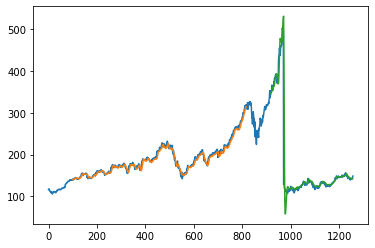

In [39]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [40]:
len(test_data)

440

In [55]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape


(1, 100)

In [56]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [440]:
temp_input

[0.8583551465000423,
 0.8866418981676942,
 0.8743139407244789,
 0.8843198513890065,
 0.8783669678290975,
 0.8986321033521913,
 0.925821160179009,
 0.9287764924427933,
 0.9567677108840666,
 0.9386979650426415,
 0.933040614709111,
 0.9495060373216249,
 0.9642404796082076,
 0.9551211686228154,
 0.9598919192772104,
 0.9663514312251966,
 0.9624672802499368,
 0.9229502659799038,
 0.9598497002448705,
 0.9879253567508233,
 0.985941062230854,
 0.9253145317909315,
 0.9217259140420504,
 0.964747107996285,
 0.9757240564046274,
 0.9915984125643842,
 0.9697289538123788,
 0.9761462467280253,
 0.9679557544541082,
 1.0000000000000002,
 0.9901629654648318,
 0.9905007177235499,
 0.9653803934813816,
 0.9848855864223593,
 0.9708688676855528,
 0.9402600692392133,
 0.8774803681499621,
 0.8348391454867856,
 0.8541332432660644,
 0.7733682344000676,
 0.7726927298826314,
 0.8801401671873683,
 0.8400743054969182,
 0.8967322468969012,
 0.8552731571392387,
 0.8388499535590646,
 0.7423372456303303,
 0.82327113062568

In [57]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps1=100
n_steps2=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps2, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps2,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.09704554]
101
1 day input [0.04638094 0.04832909 0.04453269 0.05040212 0.05042709 0.0525251
 0.05349918 0.0509516  0.05404865 0.06186623 0.05976822 0.06104201
 0.06513812 0.06181627 0.06641191 0.07060792 0.06990859 0.06918427
 0.06843499 0.07260602 0.07647735 0.07805085 0.07882512 0.08554373
 0.09068885 0.0970578  0.09373595 0.09840651 0.09688296 0.09973026
 0.10849693 0.10682352 0.10160348 0.09176283 0.10100405 0.09913083
 0.1026275  0.10702333 0.10809731 0.10255258 0.09808182 0.09973026
 0.10027973 0.09943054 0.10402618 0.10300215 0.10327689 0.10097907
 0.10085419 0.09963035 0.10027973 0.10784754 0.10837205 0.11341725
 0.11109446 0.10152855 0.10237774 0.10609921 0.1098956  0.10967081
 0.1065238  0.10447575 0.10712323 0.11841251 0.11519057 0.11688896
 0.11973625 0.12135971 0.12732904 0.12338279 0.12078525 0.10804736
 0.10949598 0.10592437 0.10819721 0.10759778 0.10077926 0.09298666
 0.0942105  0.10025476 0.10270243 0.10292722 0.0990559  0.09041411
 0.09271192 0.08939008 0.09226235 

10 day output [[0.10321189]]
11 day input [0.05976822 0.06104201 0.06513812 0.06181627 0.06641191 0.07060792
 0.06990859 0.06918427 0.06843499 0.07260602 0.07647735 0.07805085
 0.07882512 0.08554373 0.09068885 0.0970578  0.09373595 0.09840651
 0.09688296 0.09973026 0.10849693 0.10682352 0.10160348 0.09176283
 0.10100405 0.09913083 0.1026275  0.10702333 0.10809731 0.10255258
 0.09808182 0.09973026 0.10027973 0.09943054 0.10402618 0.10300215
 0.10327689 0.10097907 0.10085419 0.09963035 0.10027973 0.10784754
 0.10837205 0.11341725 0.11109446 0.10152855 0.10237774 0.10609921
 0.1098956  0.10967081 0.1065238  0.10447575 0.10712323 0.11841251
 0.11519057 0.11688896 0.11973625 0.12135971 0.12732904 0.12338279
 0.12078525 0.10804736 0.10949598 0.10592437 0.10819721 0.10759778
 0.10077926 0.09298666 0.0942105  0.10025476 0.10270243 0.10292722
 0.0990559  0.09041411 0.09271192 0.08939008 0.09226235 0.08349568
 0.088416   0.09063889 0.09386083 0.09288676 0.09266197 0.08941506
 0.08791648 0.095034

19 day output [[0.10411184]]
20 day input [0.07260602 0.07647735 0.07805085 0.07882512 0.08554373 0.09068885
 0.0970578  0.09373595 0.09840651 0.09688296 0.09973026 0.10849693
 0.10682352 0.10160348 0.09176283 0.10100405 0.09913083 0.1026275
 0.10702333 0.10809731 0.10255258 0.09808182 0.09973026 0.10027973
 0.09943054 0.10402618 0.10300215 0.10327689 0.10097907 0.10085419
 0.09963035 0.10027973 0.10784754 0.10837205 0.11341725 0.11109446
 0.10152855 0.10237774 0.10609921 0.1098956  0.10967081 0.1065238
 0.10447575 0.10712323 0.11841251 0.11519057 0.11688896 0.11973625
 0.12135971 0.12732904 0.12338279 0.12078525 0.10804736 0.10949598
 0.10592437 0.10819721 0.10759778 0.10077926 0.09298666 0.0942105
 0.10025476 0.10270243 0.10292722 0.0990559  0.09041411 0.09271192
 0.08939008 0.09226235 0.08349568 0.088416   0.09063889 0.09386083
 0.09288676 0.09266197 0.08941506 0.08791648 0.09503472 0.09773215
 0.1020031  0.10752285 0.09704554 0.09902402 0.10045719 0.10139696
 0.10198796 0.10236409 

28 day output [[0.1050846]]
29 day input [0.09688296 0.09973026 0.10849693 0.10682352 0.10160348 0.09176283
 0.10100405 0.09913083 0.1026275  0.10702333 0.10809731 0.10255258
 0.09808182 0.09973026 0.10027973 0.09943054 0.10402618 0.10300215
 0.10327689 0.10097907 0.10085419 0.09963035 0.10027973 0.10784754
 0.10837205 0.11341725 0.11109446 0.10152855 0.10237774 0.10609921
 0.1098956  0.10967081 0.1065238  0.10447575 0.10712323 0.11841251
 0.11519057 0.11688896 0.11973625 0.12135971 0.12732904 0.12338279
 0.12078525 0.10804736 0.10949598 0.10592437 0.10819721 0.10759778
 0.10077926 0.09298666 0.0942105  0.10025476 0.10270243 0.10292722
 0.0990559  0.09041411 0.09271192 0.08939008 0.09226235 0.08349568
 0.088416   0.09063889 0.09386083 0.09288676 0.09266197 0.08941506
 0.08791648 0.09503472 0.09773215 0.1020031  0.10752285 0.09704554
 0.09902402 0.10045719 0.10139696 0.10198796 0.10236409 0.10261894
 0.10280827 0.1029617  0.10309381 0.10321189 0.10332019 0.10342176
 0.10351924 0.1036148

In [58]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [59]:
import matplotlib.pyplot as plt

In [60]:
len(df1)

1257

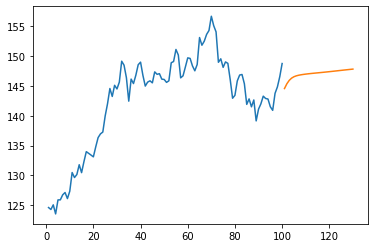

In [61]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

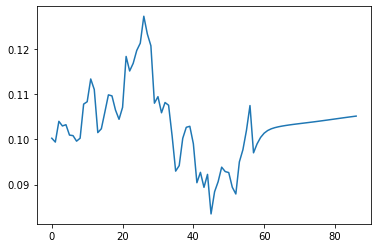

In [62]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [63]:
df3=scaler.inverse_transform(df3).tolist()

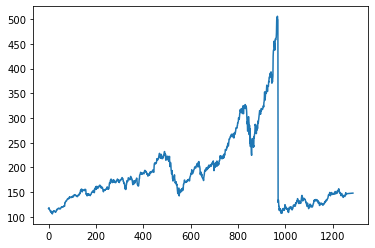

In [64]:
plt.plot(df3)